## import libraries

In [1]:
import pandas as pd
import numpy as np

## import dataset

In [2]:
data=pd.read_csv('game_sales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02,3.77,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,3.58,6.81,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88,3.79,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01,3.28,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,8.89,10.22,31.37
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.01,0.00,0.01


# pre_processing

### handle categorical data

In [3]:
data1=data.drop(['Rank','Name','Platform','Publisher','Year'],axis=1)
data1  #فیچر های بالا همگی کتگوریکال بوده و از جنس نامینال بودن ، امکان استفاده از گت دامیز و ریپلیس نیز نبود

,Genre,EU_Sales,JP_Sales,Global_Sales
0,Sports,29.02,3.77,82.74
1,Platform,3.58,6.81,40.24
2,Racing,12.88,3.79,35.82
3,Sports,11.01,3.28,33.00
4,Role-Playing,8.89,10.22,31.37
...,...,...,...,...
16593,Platform,0.00,0.00,0.01
16594,Shooter,0.00,0.00,0.01
16595,Racing,0.00,0.00,0.01
16596,Puzzle,0.01,0.00,0.01


In [4]:
data2=pd.get_dummies(data1)
data2       #این فیچر از نوع کتگوریکال نامینال هس چون برتری نسبتا به هم ندارن

,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,29.02,3.77,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,3.58,6.81,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,12.88,3.79,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,11.01,3.28,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,8.89,10.22,31.37,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.00,0.00,0.01,0,0,0,0,1,0,0,0,0,0,0,0
16594,0.00,0.00,0.01,0,0,0,0,0,0,0,0,1,0,0,0
16595,0.00,0.00,0.01,0,0,0,0,0,0,1,0,0,0,0,0
16596,0.01,0.00,0.01,0,0,0,0,0,1,0,0,0,0,0,0


### handle missing value

In [5]:
data2.isna().sum()

EU_Sales              0
JP_Sales              0
Global_Sales          0
Genre_Action          0
Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role-Playing    0
Genre_Shooter         0
Genre_Simulation      0
Genre_Sports          0
Genre_Strategy        0
dtype: int64

### handle outlier data

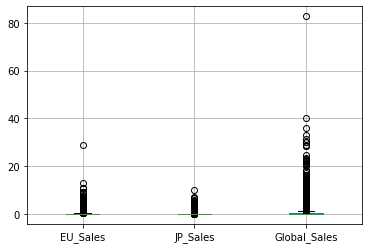

In [6]:
data2.iloc[:,[0,1,2]].boxplot()

In [7]:
#EU_Sales
Q1=data2.iloc[:,0].quantile(0.25)
Q3=data2.iloc[:,0].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

-0.165 0.275


In [8]:
data2[data2['EU_Sales']<-0.165].shape

(0, 15)

In [9]:
data3=data2[data2['EU_Sales']<0.275].reset_index().drop('index',axis=1)
data3      #تعداد رکوردهای بیشتر از حد بالا زیاد بود ، به همین خاطر از متمم استفاده میکنیم

,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.01,1.10,11.66,0,0,0,0,0,0,1,0,0,0,0,0
1,0.00,2.33,5.95,0,0,0,0,0,0,0,1,0,0,0,0
2,0.26,0.01,5.23,0,0,0,0,0,0,0,0,0,0,1,0
3,0.01,0.01,4.98,0,0,0,1,0,0,0,0,0,0,0,0
4,0.26,0.01,4.91,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14512,0.00,0.00,0.01,0,0,0,0,1,0,0,0,0,0,0,0
14513,0.00,0.00,0.01,0,0,0,0,0,0,0,0,1,0,0,0
14514,0.00,0.00,0.01,0,0,0,0,0,0,1,0,0,0,0,0
14515,0.01,0.00,0.01,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
#JP_Sales
Q1=data3.iloc[:,1].quantile(0.25)
Q3=data3.iloc[:,1].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

-0.045 0.075


In [11]:
data3[data3['JP_Sales']<-0.045].shape

(0, 15)

In [12]:
data4=data3[data3['JP_Sales']<0.075].reset_index().drop('index',axis=1)
data4          #تعداد رکوردهای بیشتر از حد بالا زیاد بود ، به همین خاطر از متمم استفاده میکنیم

,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.26,0.01,5.23,0,0,0,0,0,0,0,0,0,0,1,0
1,0.01,0.01,4.98,0,0,0,1,0,0,0,0,0,0,0,0
2,0.26,0.01,4.91,0,0,0,0,0,0,0,0,0,0,1,0
3,0.26,0.01,4.53,0,0,0,0,0,0,0,0,0,0,1,0
4,0.24,0.00,4.50,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12143,0.00,0.00,0.01,0,0,0,0,1,0,0,0,0,0,0,0
12144,0.00,0.00,0.01,0,0,0,0,0,0,0,0,1,0,0,0
12145,0.00,0.00,0.01,0,0,0,0,0,0,1,0,0,0,0,0
12146,0.01,0.00,0.01,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
#Global_Sales
Q1=data2.iloc[:,2].quantile(0.25)
Q3=data2.iloc[:,2].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

-0.5549999999999999 1.085


In [14]:
data4[data4['Global_Sales']<-0.5549999999999999].shape

(0, 15)

In [15]:
data5=data4[data4['Global_Sales']<1.085].reset_index().drop('index',axis=1)
data5   #تعداد رکوردهای بیشتر از حد بالا زیاد بود ، به همین خاطر از متمم استفاده میکنیم

,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.12,0.00,1.08,0,0,0,0,0,0,0,0,0,0,1,0
1,0.00,0.00,1.08,1,0,0,0,0,0,0,0,0,0,0,0
2,0.06,0.00,1.08,0,0,0,0,1,0,0,0,0,0,0,0
3,0.18,0.03,1.08,0,0,1,0,0,0,0,0,0,0,0,0
4,0.00,0.00,1.07,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,0.00,0.00,0.01,0,0,0,0,1,0,0,0,0,0,0,0
11912,0.00,0.00,0.01,0,0,0,0,0,0,0,0,1,0,0,0
11913,0.00,0.00,0.01,0,0,0,0,0,0,1,0,0,0,0,0
11914,0.01,0.00,0.01,0,0,0,0,0,1,0,0,0,0,0,0


### handle duplicated value

In [16]:
data5.duplicated().sum()

7388

# feature scaling

#### z_score

In [19]:
x=data5.iloc[:,[0,1,2]].values
binary=data5.iloc[:,3:].reset_index().drop('index',axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)

In [23]:
df_ss=pd.DataFrame(x_ss,columns=data5.iloc[:,[0,1,2]].columns)

In [24]:
data6=pd.concat([df_ss,binary] , axis=1)
data6

,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1.247038,-0.447170,4.539257,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.720961,-0.447170,4.539257,1,0,0,0,0,0,0,0,0,0,0,0
2,0.263038,-0.447170,4.539257,0,0,0,0,1,0,0,0,0,0,0,0
3,2.231037,1.401497,4.539257,0,0,1,0,0,0,0,0,0,0,0,0
4,-0.720961,-0.447170,4.488586,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,-0.720961,-0.447170,-0.882506,0,0,0,0,1,0,0,0,0,0,0,0
11912,-0.720961,-0.447170,-0.882506,0,0,0,0,0,0,0,0,1,0,0,0
11913,-0.720961,-0.447170,-0.882506,0,0,0,0,0,0,1,0,0,0,0,0
11914,-0.556961,-0.447170,-0.882506,0,0,0,0,0,1,0,0,0,0,0,0


#### min_max

In [25]:
x=data5.iloc[:,[0,1,2]]
binary=data5.iloc[:,3:]

In [26]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_mm=mm.fit_transform(x)

In [27]:
df_mm=pd.DataFrame(x_mm,columns=x.columns)

In [28]:
data7=pd.concat([df_mm,binary] , axis=1)
data7

,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.444444,0.000000,1.000000,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.000000,1.000000,1,0,0,0,0,0,0,0,0,0,0,0
2,0.222222,0.000000,1.000000,0,0,0,0,1,0,0,0,0,0,0,0
3,0.666667,0.428571,1.000000,0,0,1,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0.990654,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0
11912,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0
11913,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0
11914,0.037037,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0


# feature selection

#### brute_force

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
#روش بروت فورس بیشتر برای مدل های پیشبینی استفاده میشود ولی برای مدل های توصیفی نیز مجاز است

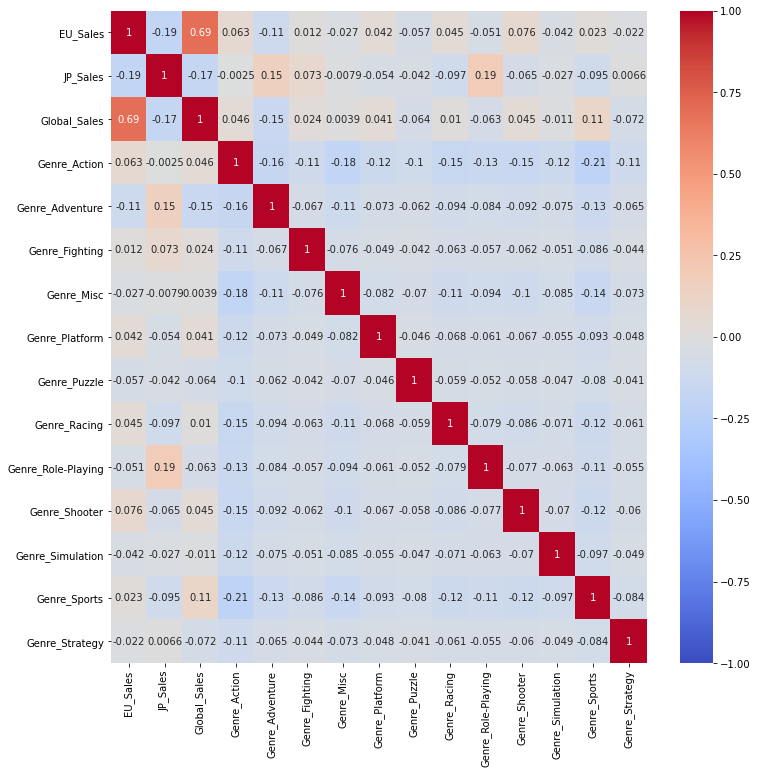

In [30]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(data5.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

#### filter method
#چون مدل توصیفی است نمیتوانیم از روش خی دو استفاده کنیم

## Principal Component Analysis (PCA)

In [31]:
from sklearn.decomposition import PCA
#از روش مینیمیم ماکسیمم مقیاس سازی رو انجام میدهیم چون دیگر داده منفی نخواهیم داشت

In [32]:
model = PCA(n_components = 3).fit(x_mm)
X_pca = model.transform(x_mm)
n_pca = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pca)]
feature_names_t = data7.columns
most_important_names = [feature_names_t[most_important[i]] for i in range(n_pca)]
most_important_names 
df = pd.DataFrame(most_important_names)
df

,0
0,EU_Sales
1,JP_Sales
2,Global_Sales
